In [3]:
import os
import pandas as pd

def process_data_from_directory(base_directory, output_file1='combined_dot1.csv', output_file2='combined_dot2.csv', output_file3='combined_dot3.csv'):
    """
    Purpose of the function:
    1. Walks through the base directory, recursively finding all subfolders.
    2. Reads CSV files with 'dot1', 'dot2', and 'dot3' prefixes into DataFrames.
    3. Combines all dot1 files, dot2 files, and dot3 files into three separate DataFrames.
    4. Saves these combined DataFrames to specified output files.
    """

    # Lists to store the data for each prefix (dot1, dot2, dot3)
    dot1_data = []
    dot2_data = []
    dot3_data = []

    # Walk through the base directory, year-based subdirectories, and month-based subdirectories
    for root, dirs, files in os.walk(base_directory):
        for file in files:
            if file.endswith('.csv'):  # If it's a CSV file
                # Check the file prefix and ensure it matches dot1, dot2, or dot3
                if file.startswith('dot1'):
                    file_path = os.path.join(root, file)
                    try:
                        df = pd.read_csv(file_path, low_memory=False)
                        dot1_data.append(df)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")

                elif file.startswith('dot2'):
                    file_path = os.path.join(root, file)
                    try:
                        df = pd.read_csv(file_path, low_memory=False)
                        dot2_data.append(df)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")

                elif file.startswith('dot3'):
                    file_path = os.path.join(root, file)
                    try:
                        df = pd.read_csv(file_path, low_memory=False)
                        dot3_data.append(df)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")

    # Concatenate the DataFrames based on the prefix (dot1, dot2, dot3)
    combined_dot1 = pd.concat(dot1_data, ignore_index=True) if dot1_data else None
    combined_dot2 = pd.concat(dot2_data, ignore_index=True) if dot2_data else None
    combined_dot3 = pd.concat(dot3_data, ignore_index=True) if dot3_data else None

    # Saving the combined data to output files
    if combined_dot1 is not None:
        combined_dot1.to_csv(output_file1, index=False)
        print(f"Combined dot1 data saved to {output_file1}")

    if combined_dot2 is not None:
        combined_dot2.to_csv(output_file2, index=False)
        print(f"Combined dot2 data saved to {output_file2}")

    if combined_dot3 is not None:
        combined_dot3.to_csv(output_file3, index=False)
        print(f"Combined dot3 data saved to {output_file3}")

    return combined_dot1, combined_dot2, combined_dot3

In [4]:
root_directory = "Data"  # Replace with your actual folder path
df1, df2, df3 = process_data_from_directory(root_directory)

# Display the structure of the combined DataFrames
print(df1.shape, df2.shape, df3.shape)


Combined dot1 data saved to combined_dot1.csv
Combined dot2 data saved to combined_dot2.csv
Combined dot3 data saved to combined_dot3.csv
(1680176, 14) (4592219, 14) (1030088, 12)


In [5]:
df1.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,AK,0115,5,NaN,XB,1220,4660,0,67,2.0,X,4,2020
1,1,AK,0901,5,NaN,XO,1220,14360,0,282,1.0,X,4,2020
2,1,AK,20XX,1,XX,NaN,2010,4293733,24971000,0,1.0,0,4,2020
3,1,AK,20XX,3,NaN,XA,1220,28283,443,563,1.0,X,4,2020
4,1,AK,20XX,3,NaN,XA,1220,29848,69,538,2.0,X,4,2020


In [6]:
df1.tail()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
1680171,2,WY,4101,3,NaN,XC,1220,8869,63,290,NaN,0,9,2024
1680172,2,WY,4101,3,NaN,XN,1220,10853,29,72,NaN,0,9,2024
1680173,2,WY,4101,3,NaN,XO,1220,59348,307,858,NaN,0,9,2024
1680174,2,WY,4101,3,NaN,XQ,1220,12689,53,382,NaN,0,9,2024
1680175,2,WY,41XX,3,NaN,NaN,2010,11931,38,136,NaN,0,9,2024


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680176 entries, 0 to 1680175
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TRDTYPE          1680176 non-null  int64  
 1   USASTATE         1680176 non-null  object 
 2   DEPE             1680176 non-null  object 
 3   DISAGMOT         1680176 non-null  int64  
 4   MEXSTATE         490667 non-null   object 
 5   CANPROV          1062514 non-null  object 
 6   COUNTRY          1680176 non-null  int64  
 7   VALUE            1680176 non-null  int64  
 8   SHIPWT           1680176 non-null  int64  
 9   FREIGHT_CHARGES  1680176 non-null  int64  
 10  DF               1046512 non-null  float64
 11  CONTCODE         1680176 non-null  object 
 12  MONTH            1680176 non-null  int64  
 13  YEAR             1680176 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 179.5+ MB


In [8]:
df1.describe()

,TRDTYPE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR
count,1.680176e+06,1.680176e+06,1.680176e+06,1.680176e+06,1.680176e+06,1.680176e+06,1.046512e+06,1.680176e+06,1.680176e+06
mean,1.377141e+00,4.838554e+00,1.510418e+03,4.179941e+06,1.751950e+06,5.518909e+04,1.328443e+00,5.801582e+00,2.021829e+03
std,4.846709e-01,1.421511e+00,3.809037e+02,4.551308e+07,4.731149e+07,1.155165e+06,4.696473e-01,3.211094e+00,1.403890e+00
min,1.000000e+00,1.000000e+00,1.220000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.020000e+03
25%,1.000000e+00,5.000000e+00,1.220000e+03,1.964800e+04,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.021000e+03
50%,1.000000e+00,5.000000e+00,1.220000e+03,1.015210e+05,3.000000e+00,3.830000e+02,1.000000e+00,6.000000e+00,2.022000e+03
75%,2.000000e+00,5.000000e+00,2.010000e+03,6.529642e+05,9.793000e+03,3.769000e+03,2.000000e+00,8.000000e+00,2.023000e+03
max,2.000000e+00,9.000000e+00,2.010000e+03,4.951806e+09,8.563936e+09,2.275531e+08,2.000000e+00,1.200000e+01,2.024000e+03


In [10]:
df1.describe(include='object')

,USASTATE,DEPE,MEXSTATE,CANPROV,CONTCODE
count,1680176,1680176,490667,1062514,1680176
unique,52,246,33,14,3
top,TX,2304,XX,XO,0
freq,99760,184938,57311,287110,919877


In [11]:
df1.duplicated().sum()

179691

In [13]:
df1.shape

(1680176, 14)

In [14]:
df1 = df1.drop_duplicates()

In [15]:
df1.shape

(1500485, 14)

In [17]:
df1.isnull().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           1061208
CANPROV             552589
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                  565200
CONTCODE                 0
MONTH                    0
YEAR                     0
dtype: int64

In [18]:
df1.describe()

,TRDTYPE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR
count,1.500485e+06,1.500485e+06,1.500485e+06,1.500485e+06,1.500485e+06,1.500485e+06,935285.000000,1.500485e+06,1.500485e+06
mean,1.376678e+00,4.840942e+00,1.510936e+03,4.294600e+06,1.748638e+06,5.613322e+04,1.329008,6.020867e+00,2.022048e+03
std,4.845533e-01,1.423634e+00,3.810457e+02,4.678569e+07,4.774420e+07,1.180991e+06,0.469853,3.257490e+00,1.326010e+00
min,1.000000e+00,1.000000e+00,1.220000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,2.020000e+03
25%,1.000000e+00,5.000000e+00,1.220000e+03,1.985000e+04,0.000000e+00,0.000000e+00,1.000000,3.000000e+00,2.021000e+03
50%,1.000000e+00,5.000000e+00,1.220000e+03,1.033370e+05,3.000000e+00,3.820000e+02,1.000000,6.000000e+00,2.022000e+03
75%,2.000000e+00,5.000000e+00,2.010000e+03,6.668740e+05,9.575000e+03,3.784000e+03,2.000000,9.000000e+00,2.023000e+03
max,2.000000e+00,9.000000e+00,2.010000e+03,4.951806e+09,8.563936e+09,2.275531e+08,2.000000,1.200000e+01,2.024000e+03


In [20]:
#percentage of missing values per 'MEXSTATE' column
df1['MEXSTATE'].isnull().sum()/len(df1)*100

70.72433246583604

In [21]:
#percentage of missing values per 'CANPROV' column
df1['CANPROV'].isnull().sum()/len(df1)*100

36.82735915387358

In [22]:
# Rows where both 'MEXSTATE' and 'CANPROV' are missing
both_missing = df1[pd.isnull(df1['MEXSTATE']) & pd.isnull(df1['CANPROV'])]

# Counts the number of rows where both 'MEXSTATE' and 'CANPROV' are missing
missing_count = both_missing.shape[0]

# Displays the rows where both MEXSTATE and CANPROV are missing
print("Rows where both MEXSTATE and CANPROV are missing:")
print(both_missing)

# Displays the count of rows where both MEXSTATE and CANPROV are missing
print(f"\nTotal number of rows where both MEXSTATE and CANPROV are missing: {missing_count}")

Rows where both MEXSTATE and CANPROV are missing:
         TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY   VALUE  \
1035           1       CA  2304         5      NaN     NaN     2010  101722   
1252           1       CA  2506         5      NaN     NaN     2010   26649   
1298           1       CA  2507         5      NaN     NaN     2010    7000   
1344           1       CA  2604         5      NaN     NaN     2010   39312   
2592           1       FL  2304         5      NaN     NaN     2010  131553   
...          ...      ...   ...       ...      ...     ...      ...     ...   
1680112        2       WY  2507         5      NaN     NaN     2010   71848   
1680124        2       WY  30XX         5      NaN     NaN     2010    7004   
1680132        2       WY  3307         3      NaN     NaN     2010    2050   
1680144        2       WY  33XX         5      NaN     NaN     2010   23409   
1680175        2       WY  41XX         3      NaN     NaN     2010   11931   

 

In [23]:
#calculating the percentage of values that have missing data for both 'MEXSTATE' and 'CANPROV'
missing_count_percentage = missing_count / len(df1)*100
missing_count_percentage 

7.5516916197096275

In [25]:
# Filter for rows where both 'MEXSTATE' and 'CANPROV' are NaN
condition = pd.isnull(df1['MEXSTATE']) & pd.isnull(df1['CANPROV'])

# Drop the rows where both 'MEXSTATE' and 'CANPROV' are NaN
df1 = df1[~condition]

In [26]:
#checking null values after handling missing values in both 'MEXSTATE' and 'CANPROV'
df1.isnull().sum()

TRDTYPE                 0
USASTATE                0
DEPE                    0
DISAGMOT                0
MEXSTATE           947896
CANPROV            439277
COUNTRY                 0
VALUE                   0
SHIPWT                  0
FREIGHT_CHARGES         0
DF                 453010
CONTCODE                0
MONTH                   0
YEAR                    0
dtype: int64

In [27]:
# Checking for Rows where both MEXSTATE and CANPROV are missing after dropping the values
both_missing = df1[pd.isnull(df1['MEXSTATE']) & pd.isnull(df1['CANPROV'])]

# Count the number of such rows
missing_count = both_missing.shape[0]

# Display the count of rows where both MEXSTATE and CANPROV are missing
print(f"\nTotal number of rows where both MEXSTATE and CANPROV are missing: {missing_count}")


Total number of rows where both MEXSTATE and CANPROV are missing: 0


Matplotlib is building the font cache; this may take a moment.


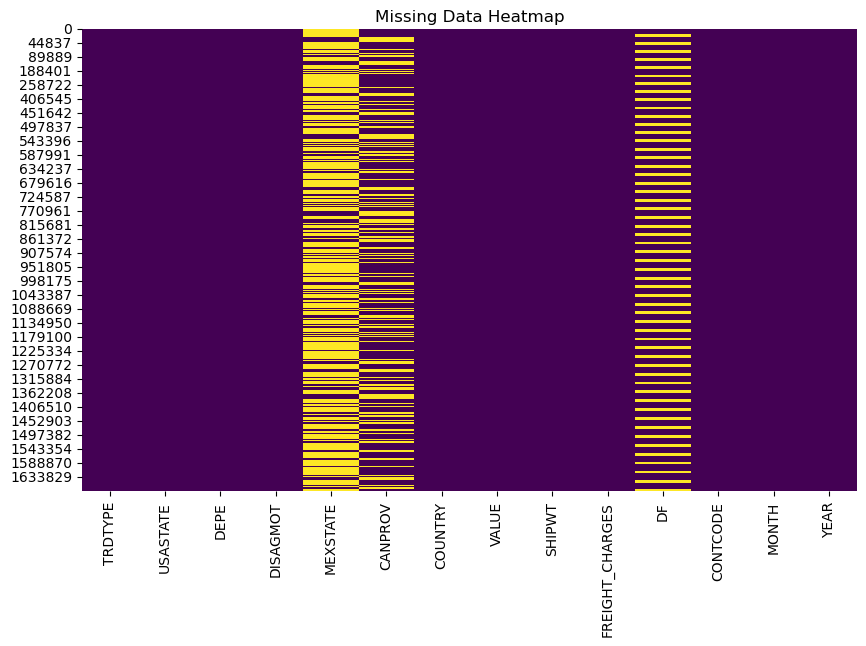

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
#Heatmap of missing data after dropping rows with missing values for both 'MEXSTATE' & 'CANPROV'
plt.figure(figsize=(10, 6))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [32]:
#percentage of missing values per 'DF' column
df1['DF'].isnull().sum()/len(df1)*100

32.65706584542807

In [33]:
# this was done using the mode of 'DF' grouped by 'USASTATE'

# checking the missing values in the 'DF' column
missing_values = df1['DF'].isna().sum()
print(f"Missing values: {missing_values}")


# Imputing missing values based on 'USASTATE' column
df1['DF'] = df1.groupby(['USASTATE'], group_keys=False)['DF'].apply(lambda x: x.fillna(x.mode()[0]))


print(df1.head())

# checking the missing values in the 'DF' column after handling missing values
missing_values = df1['DF'].isna().sum()
print(f"Missing values: {missing_values}")


Missing values: 453010
   TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       AK  20XX         3      NaN      XA     1220    28283   
4        1       AK  20XX         3      NaN      XA     1220    29848   

     SHIPWT  FREIGHT_CHARGES   DF CONTCODE  MONTH  YEAR  
0         0               67  2.0        X      4  2020  
1         0              282  1.0        X      4  2020  
2  24971000                0  1.0        0      4  2020  
3       443              563  1.0        X      4  2020  
4        69              538  2.0        X      4  2020  
Missing values: 0


In [34]:
df1.isnull().sum()

TRDTYPE                 0
USASTATE                0
DEPE                    0
DISAGMOT                0
MEXSTATE           947896
CANPROV            439277
COUNTRY                 0
VALUE                   0
SHIPWT                  0
FREIGHT_CHARGES         0
DF                      0
CONTCODE                0
MONTH                   0
YEAR                    0
dtype: int64

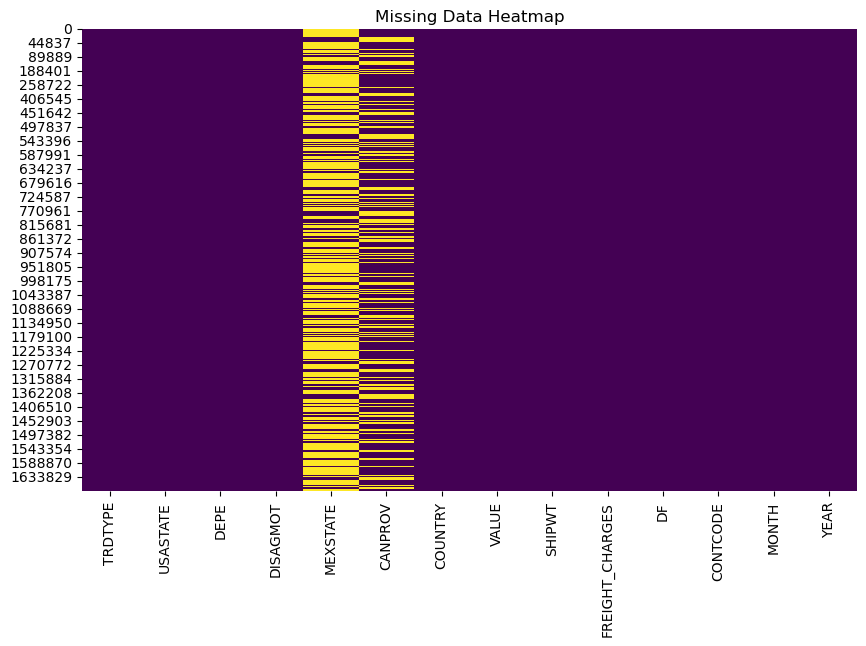

In [35]:
#Heatmap of missing data after handling missing values in 'DF'
plt.figure(figsize=(10, 6))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [36]:
#percentage of missing values per 'MONTH' column
df1['MONTH'].isnull().sum()/len(df1)*100

0.0

In [37]:
#dropping missing 
df1 = df1.dropna(subset=['MONTH'])

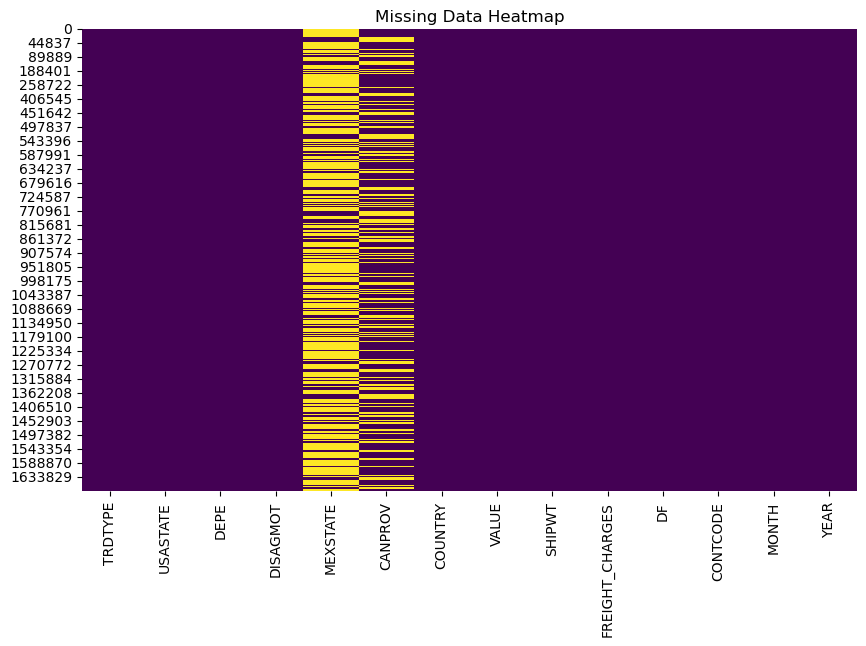

In [38]:
#Heatmap after handling missing values in month column

plt.figure(figsize=(10, 6))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [40]:
df1.isnull().sum()

TRDTYPE                 0
USASTATE                0
DEPE                    0
DISAGMOT                0
MEXSTATE           947896
CANPROV            439277
COUNTRY                 0
VALUE                   0
SHIPWT                  0
FREIGHT_CHARGES         0
DF                      0
CONTCODE                0
MONTH                   0
YEAR                    0
dtype: int64

In [42]:
df1.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,AK,0115,5,NaN,XB,1220,4660,0,67,2.0,X,4,2020
1,1,AK,0901,5,NaN,XO,1220,14360,0,282,1.0,X,4,2020
2,1,AK,20XX,1,XX,NaN,2010,4293733,24971000,0,1.0,0,4,2020
3,1,AK,20XX,3,NaN,XA,1220,28283,443,563,1.0,X,4,2020
4,1,AK,20XX,3,NaN,XA,1220,29848,69,538,2.0,X,4,2020


In [43]:
df1['TRDTYPE'].value_counts()

TRDTYPE
1    934163
2    453010
Name: count, dtype: int64

In [44]:
# Renaming values in theb 'TRDTYPE' column
df1["TRDTYPE"] = df1["TRDTYPE"].replace({1: 'Export',
    2: 'Import'})

In [45]:
df1['TRDTYPE'].value_counts()

TRDTYPE
Export    934163
Import    453010
Name: count, dtype: int64

In [46]:
df1['USASTATE'].value_counts()

USASTATE
TX    82134
CA    66451
IL    53352
OH    43850
PA    43351
NY    43291
FL    42631
GA    41443
MI    39264
WI    38065
NC    36746
NJ    35881
MN    35321
IN    35230
WA    35138
TN    33910
MA    32860
AZ    31669
MO    29161
SC    27936
KY    27211
VA    26886
OR    26171
CO    25747
KS    25252
IA    24655
CT    24286
AL    23329
LA    22903
UT    22138
MD    22046
OK    21580
MS    20826
NV    19752
NE    19142
ME    18642
AR    18219
ID    17822
NH    17440
ND    15688
MT    14172
SD    13264
VT    13062
DE    12429
NM    12249
RI    11806
WV    11178
WY     9028
AK     8195
DU     7505
HI     3975
DC     2891
Name: count, dtype: int64

In [47]:
df1['DEPE'].value_counts()

DEPE
2304    155383
3802     59721
20XX     57484
3401     51402
0901     50778
         ...  
1902         7
3881         4
0182         2
0152         2
3385         1
Name: count, Length: 246, dtype: int64

In [48]:
df1['DISAGMOT'].value_counts()

DISAGMOT
5    777628
3    268592
6    210345
8     90279
1     31341
7      5819
9      2278
4       891
Name: count, dtype: int64

In [49]:
# renaming values in the 'DISAGMOT' column #FTZ = Foreign Trade Zones
df1["DISAGMOT"] = df1["DISAGMOT"].replace({1: 'Vessel',
    3: 'Air',
    4: 'Mail',
    5: 'Truck',
    6: 'Rail',
    7: 'Pipeline',
    8: 'Other',
    9: 'FTZs'
    })

In [50]:
df1['DISAGMOT'].value_counts()

DISAGMOT
Truck       777628
Air         268592
Rail        210345
Other        90279
Vessel       31341
Pipeline      5819
FTZs          2278
Mail           891
Name: count, dtype: int64

In [51]:
df1['MEXSTATE'].value_counts()

MEXSTATE
XX    51000
MX    38557
NL    31359
CH    29003
DF    24838
JA    24405
BC    22568
SO    20256
TM    20216
CO    20006
QT    18177
OT    16827
GT    16174
SI    11069
SL    10674
PU     9207
AG     8700
DG     8676
CM     7253
VE     7066
HG     6930
MI     5529
MO     5356
TL     4258
ZA     3880
QR     3442
BS     3432
YU     2796
TB     2051
CL     1635
OA     1553
CS     1367
GR     1017
Name: count, dtype: int64

In [52]:
df1['CANPROV'].value_counts()

CANPROV
XO    255316
XQ    169771
XC    151019
XA    135632
XM     89455
XS     53196
XB     47868
XN     25180
XP     10845
XW      8095
XY       944
OT       273
XT       247
XV        55
Name: count, dtype: int64

In [53]:
df1['COUNTRY'].value_counts()

COUNTRY
1220    947896
2010    439277
Name: count, dtype: int64

In [54]:
# Renaming values in the 'COUNTRY' column
df1["COUNTRY"] = df1["COUNTRY"].replace({1220: 'Canada',
    2010: 'Mexico'})

In [55]:
df1['COUNTRY'].value_counts()

COUNTRY
Canada    947896
Mexico    439277
Name: count, dtype: int64

In [56]:
df1['VALUE'].count()

1387173

In [57]:
df1['SHIPWT'].count()

1387173

In [58]:
df1['FREIGHT_CHARGES'].count()

1387173

In [59]:
df1['DF'].value_counts()

DF
1.0    1079766
2.0     307407
Name: count, dtype: int64

In [60]:
# Renaming values in the 'DF' column
df1["DF"] = df1["DF"].replace({1.0: 'Domestic',
    2.0: 'Foreign'})

In [61]:
df1['DF'].value_counts()

DF
Domestic    1079766
Foreign      307407
Name: count, dtype: int64

In [62]:
df1['CONTCODE'].value_counts()

CONTCODE
0    728677
X    545183
1    113313
Name: count, dtype: int64

In [63]:
df1['CONTCODE'].value_counts()

CONTCODE
0    728677
X    545183
1    113313
Name: count, dtype: int64

In [64]:
df1['MONTH'].value_counts()

MONTH
3     131929
8     129489
6     129070
7     128594
9     128467
5     128299
4     127448
2     126478
1     124383
10     78735
11     77897
12     76384
Name: count, dtype: int64

In [66]:
# renaming the values of the month column
df1["MONTH"] = df1["MONTH"].replace({1.0: 'January',
    2.0: 'February',
    3.0: 'March',
    4.0: 'April',
    5.0: 'May',
    6.0: 'June',
    7.0: 'July',
    8.0: 'August',
    9.0: 'September',
    10.0: 'October',
    11.0: 'November',
    12.0: 'December'})

In [67]:
df1['MONTH'].value_counts()

MONTH
March        131929
August       129489
June         129070
July         128594
September    128467
May          128299
April        127448
February     126478
January      124383
October       78735
November      77897
December      76384
Name: count, dtype: int64

In [68]:
df1['YEAR'].value_counts()

YEAR
2023    315906
2022    312399
2021    302699
2024    241799
2020    214370
Name: count, dtype: int64

In [69]:
#Changing datatypes
df1 = df1.astype({'TRDTYPE':'str',
                                      'DISAGMOT':'str',
                                      'COUNTRY':'str',
                                      'DF':'str',
                                      'CONTCODE':'str',
                                      'MONTH':'str',
                                      'YEAR':'str'
    
})

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1387173 entries, 0 to 1680174
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   TRDTYPE          1387173 non-null  object
 1   USASTATE         1387173 non-null  object
 2   DEPE             1387173 non-null  object
 3   DISAGMOT         1387173 non-null  object
 4   MEXSTATE         439277 non-null   object
 5   CANPROV          947896 non-null   object
 6   COUNTRY          1387173 non-null  object
 7   VALUE            1387173 non-null  int64 
 8   SHIPWT           1387173 non-null  int64 
 9   FREIGHT_CHARGES  1387173 non-null  int64 
 10  DF               1387173 non-null  object
 11  CONTCODE         1387173 non-null  object
 12  MONTH            1387173 non-null  object
 13  YEAR             1387173 non-null  object
dtypes: int64(3), object(11)
memory usage: 158.7+ MB


In [71]:
df1['MONTH'].unique()

array(['April', 'August', 'February', 'January', 'July', 'March', 'May',
       'June', 'September', 'December', 'November', 'October'],
      dtype=object)

In [72]:
#describing the categorical variables
df1.describe(include='object')

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,DF,CONTCODE,MONTH,YEAR
count,1387173,1387173,1387173,1387173,439277,947896,1387173,1387173,1387173,1387173,1387173
unique,2,52,246,8,33,14,2,2,3,12,5
top,Export,TX,2304,Truck,XX,XO,Canada,Domestic,0,March,2023
freq,934163,82134,155383,777628,51000,255316,947896,1079766,728677,131929,315906


In [73]:
df1['MEXSTATE'].unique()

array([nan, 'XX', 'CO', 'NL', 'CH', 'CM', 'GT', 'JA', 'MX', 'OT', 'QT',
       'SL', 'BC', 'BS', 'DF', 'TM', 'ZA', 'DG', 'HG', 'SO', 'AG', 'MI',
       'MO', 'PU', 'TL', 'VE', 'SI', 'YU', 'TB', 'CS', 'CL', 'OA', 'QR',
       'GR'], dtype=object)

In [74]:
#describing the categorical variables
df1.describe()

,VALUE,SHIPWT,FREIGHT_CHARGES
count,1.387173e+06,1.387173e+06,1.387173e+06
mean,3.256269e+06,1.470102e+06,4.767601e+04
std,3.403008e+07,4.800538e+07,1.187160e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.940300e+04,0.000000e+00,0.000000e+00
50%,9.810700e+04,0.000000e+00,3.000000e+02
75%,6.068850e+05,4.177000e+03,3.287000e+03
max,4.727760e+09,8.563936e+09,2.275531e+08


In [75]:
df1['USASTATE'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'DU', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [76]:
df1['DF'].unique()

array(['Foreign', 'Domestic'], dtype=object)

C:\Users\wilson.asante\AppData\Local\Temp\ipykernel_22216\344340051.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='YEAR', y='VALUE', data=df1, palette='coolwarm', ax=axes[0, 0])
C:\Users\wilson.asante\AppData\Local\Temp\ipykernel_22216\344340051.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
C:\Users\wilson.asante\AppData\Local\Temp\ipykernel_22216\344340051.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='YEAR', y='SHIPWT', data=df1, palette='coolwarm', ax=axes[0, 1])
C:\Users\wilson.asante\AppData\Local\Temp\ipykern

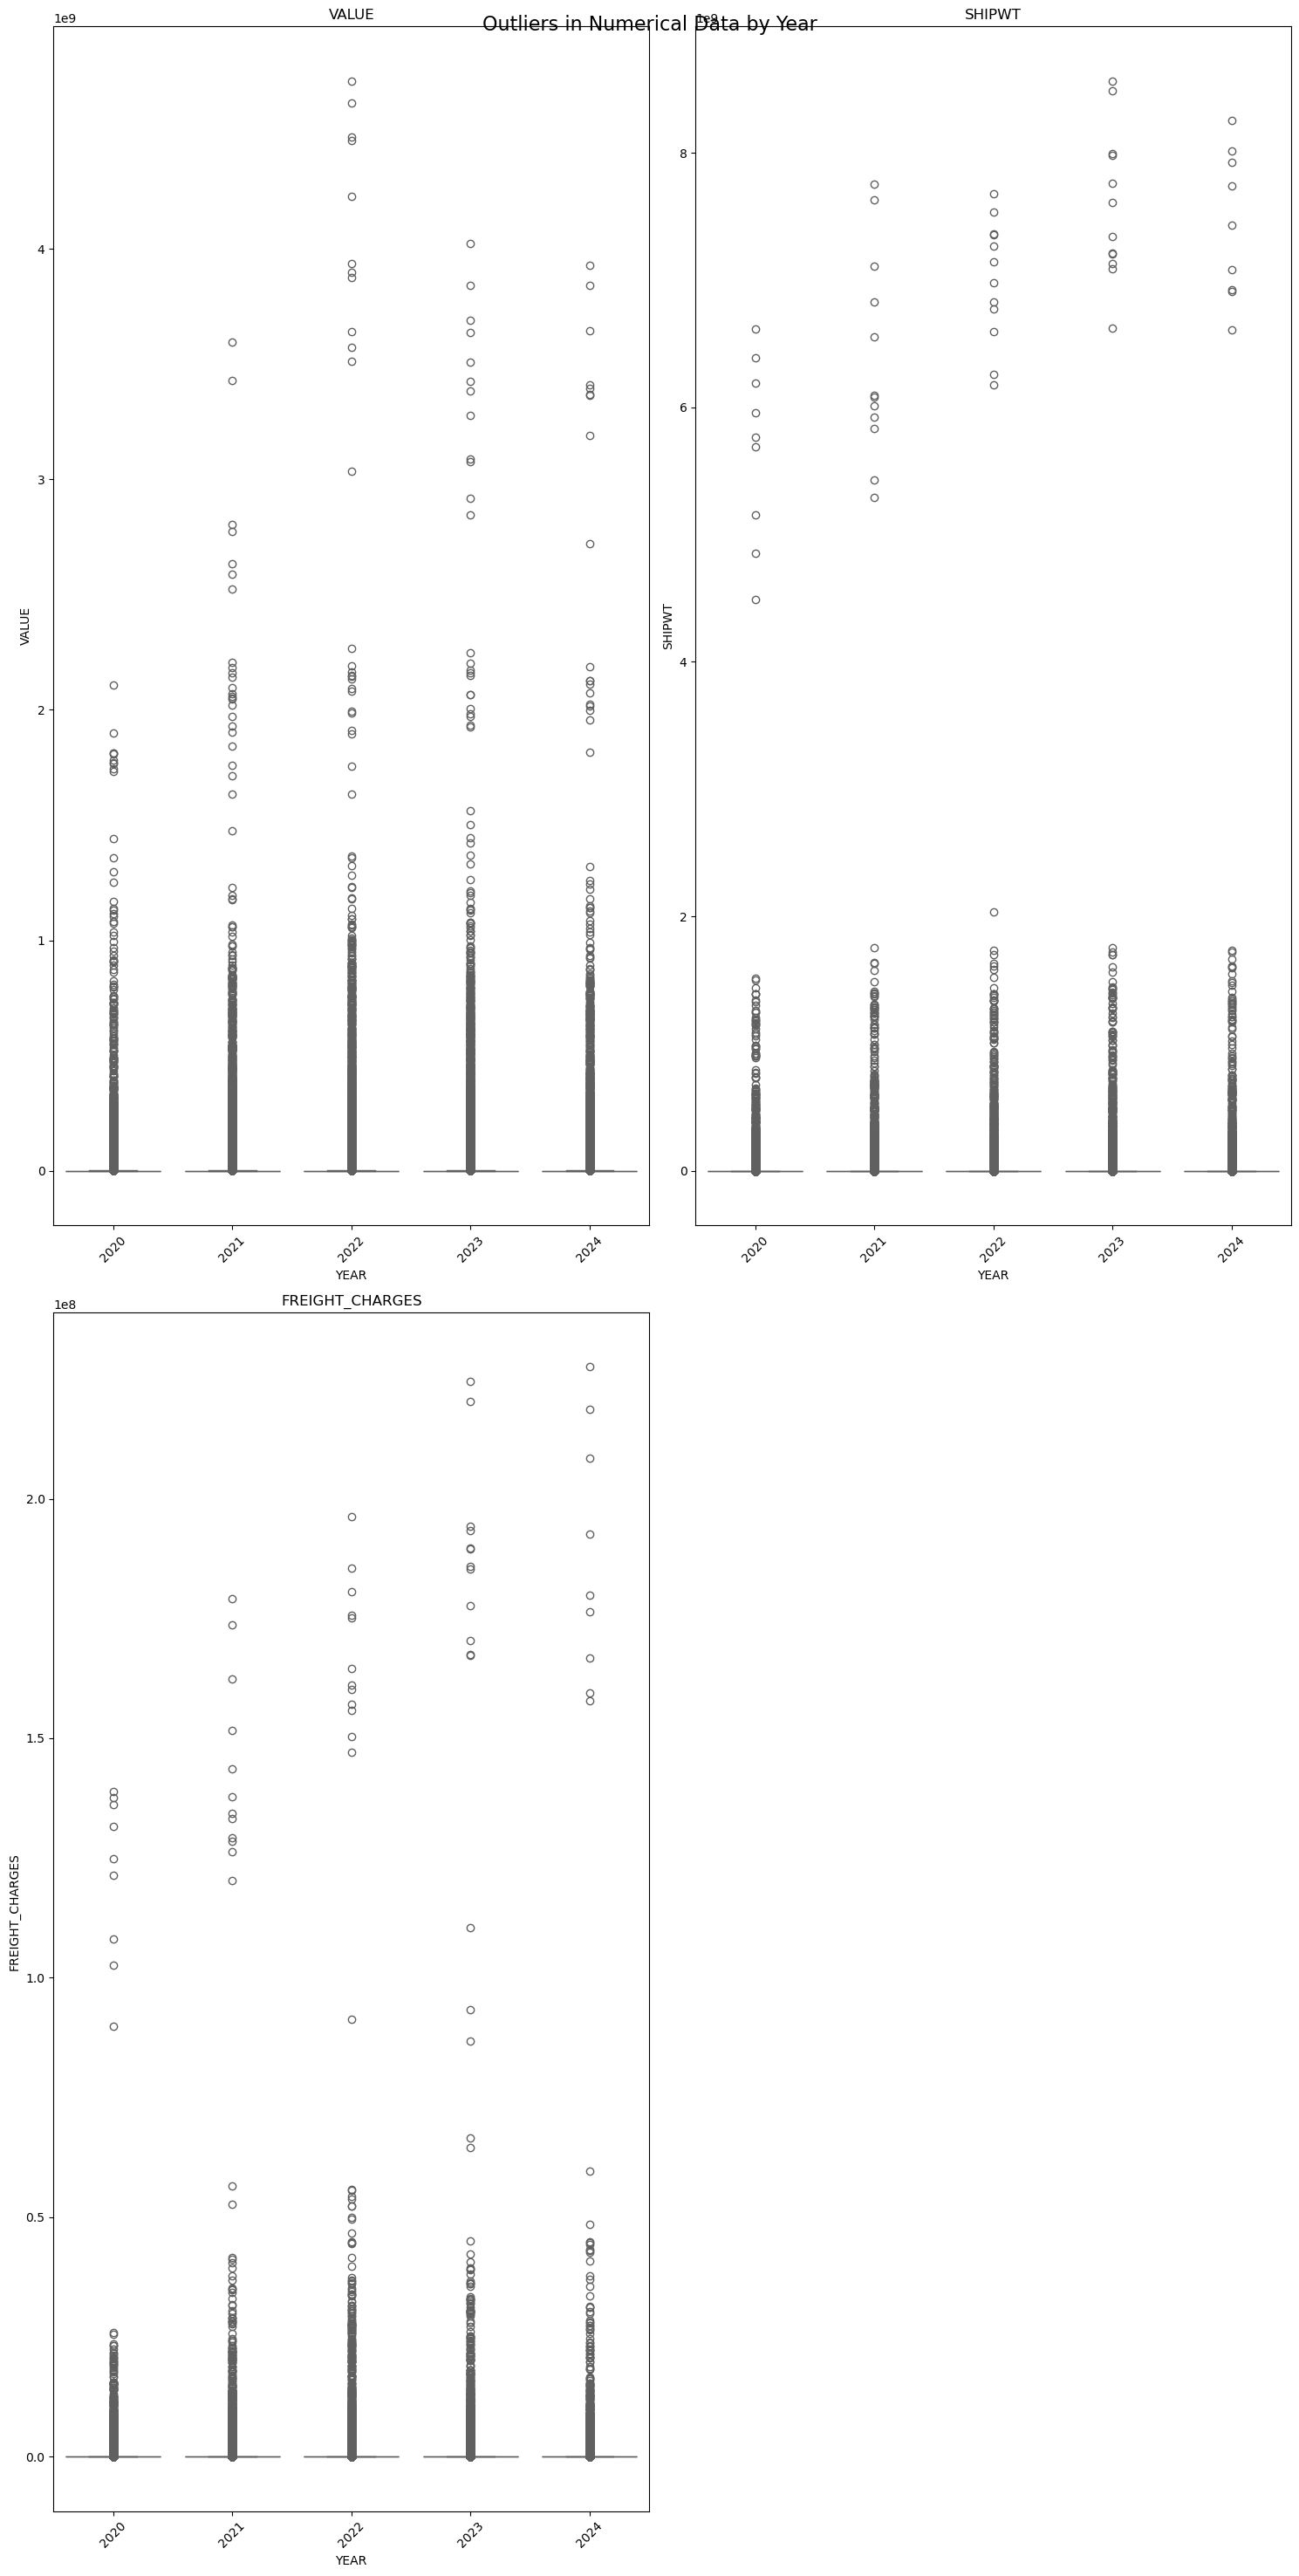

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 30))
plt.suptitle('Outliers in Numerical Data by Year', fontsize=16)

# Plot VALUE by year (boxplot)
sns.boxplot(x='YEAR', y='VALUE', data=df1, palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('VALUE')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Plot SHIPWT by year (boxplot)
sns.boxplot(x='YEAR', y='SHIPWT', data=df1, palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('SHIPWT')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Plot FREIGHT_CHARGES by year (boxplot)
sns.boxplot(x='YEAR', y='FREIGHT_CHARGES', data=df1, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('FREIGHT_CHARGES')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Hide the bottom right subplot since it's not needed
axes[1, 1].axis('off')

# Improve layout to prevent overlapping labels
plt.tight_layout()
plt.show()


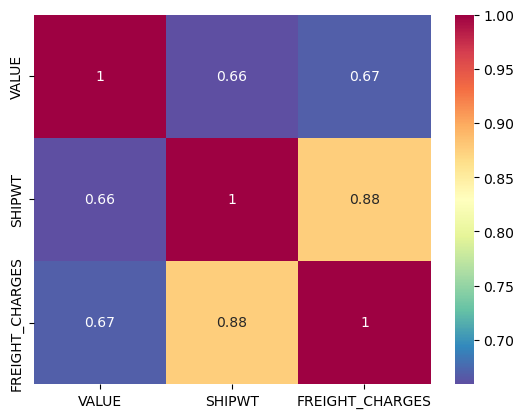

In [78]:
#Finding the correlation between numerical variables
# Create correlation matrix
correlation = df1.select_dtypes("number").corr()
correlation

# Plot heatmap of `correlation`
sns.heatmap(correlation,annot = correlation,cmap = 'Spectral_r');